In [84]:
# clear all the variables
%reset -f

## PDE Approximation: the explicit method

From Taylor formula, we can approximate any partial derivatives from a function $f(x, t)$ by their finite difference (provided the function is sufficiently smooth). For the Heat equation, the approximations are:
\begin{align}
\frac{\partial y}{\partial \tau}(x_i, \tau_j) & \approx \frac{y(x_i, \tau_{j+1}) - y(x_i, \tau_{j})}{\delta \tau}\\
\frac{\partial^2 y}{\partial x^2}(x_i, \tau_j) & \approx \frac{y(x_{i+1}, \tau_j) - 2y(x_i, \tau_j) + y(x_{i - 1}, \tau_{j})}{(\delta x)^2}
\end{align}

and the errors are respectively $\mathcal O(t^2)$ and $\mathcal O(x^4)$. Hence the Black and Scholes PDE can be approximated by 

\begin{equation}
\frac{y(x_i, \tau_{j+1}) - y(x_i, \tau_{j})}{\delta \tau}  - \frac{y(x_{i+1}, \tau_j) - 2y(x_i, \tau_j) + y(x_{i - 1}, \tau_{j})}{(\delta x)^2} \approx 0
\end{equation}
with the associated error terms. Hence the values of $y$ at the subsequent state $\tau_{j+1}$ is given by:
\begin{equation}
y(x_i, \tau_{j+1}) \approx y(x_i, \tau_{j}) + \frac{\delta \tau}{(\delta x)^2} \left[y(x_{i+1}, \tau_j) - 2y(x_i, \tau_j) + y(x_{i - 1}, \tau_{j})\right]
\end{equation}
This is called the **forward Euler method**. The method is **iterative** in nature: provided the state of the system at $\tau=0$ and the boundary conditions, it is possible to deduce all the subsequent states.

However, this method very often fails to give a reliable approximation (details). The method is said to be **stiff**. For example, consider the ordinary differential equation

\begin{equation}
\frac{dy}{dt}=-15y(t), \hspace{2em} t\geq 0, y(0)=1
\end{equation}
The exact solution is equal to $y(t)=e^{-15t}$. On the other hand, given a step size $\delta t$, the forward Euler method gives the following iterative rule

\begin{equation}
y(t+1) \approx (1-15\delta t)y(t)
\end{equation}

The following code gives the approximation of $y$ for various values of $\delta t$:

In [85]:
# example 1: simple ODE
import numpy as np

def forwardEuler(handle, h, y0, x0, x1):
    '''
    initial conditions
    '''
    y = y0
    
    vals = []
    while (x0 < x1):
        vals.append((x0, y))
        y=handle(y, x0, h)
        x0 = x0 + h
        
    return vals
    
def approx(y, x, h):
    return (1-15 * h) * y

step = [4, 6, 8, 10, 12, 16]

y0 = 1.0
x0 = 0.0
x1 = 1

values = [forwardEuler(approx, (x1 - x0) / s, y0, x0, x1) for s in step]
values.append([(t[0], np.exp(-15 * t[0])) for t in values[-1]])
step.append('exact')

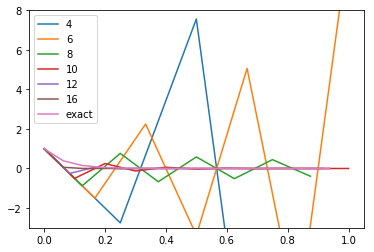

In [87]:
#create the plot
import matplotlib.pyplot as plt

vals = [zip(*v) for v in values]
[plt.plot(x[0], x[1]) for x in vals]
plt.ylim([-3.0, 8.0])
plt.legend(step)
plt.show()

## PDE Approximation: the implicit method

Alternatively, one can apply the same method to get an **implicit** formulation of y(x, t). Starting from the system

\begin{align}
\frac{\partial y}{\partial \tau}(x_i, \tau_j) & \approx \frac{y(x_i, \tau_{j+1}) - y(x_i, \tau_{j})}{\delta \tau}\\
\frac{\partial^2 y}{\partial x^2}(x_i, \tau_{j+1}) & \approx \frac{y(x_{i+1}, \tau_{j+1}) - 2y(x_i, \tau_{j+1}) + y(x_{i - 1}, \tau_{j+1})}{(\delta x)^2}
\end{align}

Applying to the heat equation, one gets:

\begin{equation}
-\frac{\delta\tau}{(\delta x)^2} y(x_{i+1}, \tau_{j+1}) + \left[1 + \frac{2\delta\tau}{(\delta x)^2}\right]y(x_i, \tau_{j+1}) - \frac{\delta \tau}{(\delta x)^2}y(x_{i-1}, \tau_{j+1}) \approx y(x_i, \tau_{j})
\end{equation}

together with the boundary conditions, one can come up with a system

\begin{equation}
A\cdot y_{j + 1}=y_{j}
\end{equation}

and provided the matrix $A$ is invertible, one get an expression for $y_{j + 1}$.

### Example: Heat equation with homogeneous Dirichlet BC

We got the following system of equations:
\begin{align}
& -\frac{\delta\tau}{(\delta x)^2} y(x_{i+1}, \tau_{j+1}) + \left[1 + \frac{2\delta\tau}{(\delta x)^2}\right]y(x_i, \tau_{j+1}) - \frac{\delta \tau}{(\delta x)^2}y(x_{i-1}, \tau_{j+1}) \approx y(x_i, \tau_{j})\\
& y(0, \tau_j) = y(1, \tau_j) = 0, \forall j\\
& y(x_i, 0) = \mathbb 1_{[x=0.5]}
\end{align}

Assume $\delta \tau = 1$ and $\delta x = 0.25$, then:

\begin{align}
bla
\end{align}

In [115]:
import numpy as np

pw = 6
dx = 1.0 / 2.0 ** pw
n = int(1.0 / dx + 1.0)
T = 100
dt = 1.0 / T

a = - dt / dx ** 2
b = 1.0 + (2.0 * dt) / dx ** 2

res = []; A = []; B = []
# build the A matrix
for i in range(n):
    A_i = []
    for j in range(n):
        if(i == j):
            A_i.append(b)
        elif(abs(i-j) == 1):
            A_i.append(a)
        else:
            A_i.append(0.0)
    A.append(A_i)
    
    if(i == (n - 1) / 2):
        B.append(1.0)
    else:
        B.append(0.0)
    
A_I = np.matrix(A).I
B = np.matrix(B).transpose()
for t in range(T + 1):
    res.append(B.transpose())
    B = A_I * B

In [116]:
print(len(res), len(res[0]), type(res), res)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0.0, 1.0 + dx, dx)
Y = np.arange(0.0, 1.0 + dt, dt)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, res, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


(101, 1, <type 'list'>, [matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), matrix([[ 0.00014144,  0.00028633,  0.00043821,  0.00060079,  0.00077804,
          0.00097428,  0.00119431,  0.0014435 ,  0.00172793,  0.00205454,
          0.00243132,  0.00286745,  0.00337359,  0.00396209,  0.00464732,
          0.00544601,  0.00637766,  0.00746502,  0.00873463,  0.01021748,
          0.01194979,  0.01397383,  0.01633904,  0.01910315,  0.02233364,
          0.02610939,  0.03052258,  0.03568094,  0.04171042,  0.04875823,
          0.05699642,  0.06662612,  0.07788244,  0.06662612,  0.05699642,
          0.04875823,  0.04171042,  0.03568094,  0.03052258,  0.02610939,
          

ValueError: too many values to unpack

## Crank-Nicholson method